<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [40]:
import numpy as np
import modbp 
import os,sys,re
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
from time import time
sys.path.append(os.path.abspath('.'))
from create_multiplex_functions import call_gen_louvain
graphics_dir="/Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/ModBP_gh/multimodbp_manuscript/graphics/"


In [ ]:
ntrials=10

#we scale the number of edges proportionally
sizes=[100,200,400,800,1600,3200,6400]

time_df=pd.DataFrame()

for i,s in enumerate(sizes):
    for ntrial in range(ntrials):
        csbm=modbp.generate_planted_partitions_dynamic_sbm(n=s,nlayers=5,c=10,eta=.1,
                                                      ncoms=2,epsilon=.1)
        t=time()
        bpobj=modbp.ModularityBP(csbm,align_communities_across_layers_temporal=True)
        bstar=bpobj.get_bstar(q=2)
        bpobj.run_modbp(q=2,beta=bstar,resgamma=1.0,omega=1.0)
        tfin=time()-t
        cind=time_df.shape[0]
        
        t=time()
        S=call_gen_louvain(csbm,gamma=1.0,omega=1.0)
        tgenlouvain=time()-t
        
        time_df.loc[cind,'s']=s
        time_df.loc[cind,'ntrial']=ntrial
        time_df.loc[cind,'time_modbp']=tfin
        time_df.loc[cind,'time_genlouvain']=tgenlouvain
        time_df.loc[cind,'AMI_layer_avg_modbp']=bpobj.retrieval_modularities.iloc[-1,:]['AMI_layer_avg']
        time_df.loc[cind,'AMI_layer_avg_genlouvain']=csbm.get_AMI_layer_avg_with_communities(S)


b''
b''
b''
b''


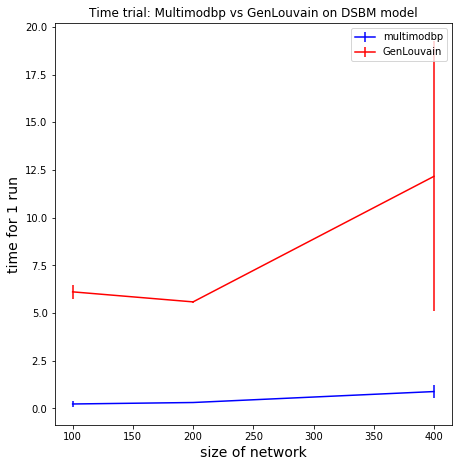

In [52]:
outfile=os.path.join(graphics_dir,"time_trial_vs_genlouvain.png")
times_modbp_mean=time_df.groupby('s')['time_modbp'].mean()
times_modbp_std=time_df.groupby('s')['time_modbp'].std()

times_gl_mean=time_df.groupby('s')['time_genlouvain'].mean()
times_gl_std=time_df.groupby('s')['time_genlouvain'].std()

plt.close()
f,a=plt.subplots(1,1,figsize=(6,6))
a.errorbar(x=times_modbp_mean.index,y=times_modbp_mean.values,yerr=times_modbp_std,color='b',
           label='multimodbp')
a.errorbar(x=times_gl_mean.index,y=times_gl_mean.values,yerr=times_gl_std,color='r',
          label='GenLouvain')
a.set_ylabel("time for 1 run",fontsize=14)
a.set_xlabel("size of network",fontsize=14)
a.set_title("Time trial: Multimodbp vs GenLouvain on DSBM model")

a.legend()
f.subplots_adjust(top=.98,bottom=.05,right=.99,left=.07)
plt.show()


In [45]:
times_modbp_mean

s
100.0   NaN
200.0   NaN
400.0   NaN
800.0   NaN
Name: time_modbp, dtype: float64

In [ ]:
a.errorbar